### Проектная работа "Метрики и воронки"

#### Описание проекта

Я — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Моя задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: 
- лог сервера с данными об их посещениях,  
- выгрузка их покупок за этот период,  
- рекламные расходы.

Предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются, 
- сколько стоит привлечение пользователей из различных рекламных каналов; 
- сколько денег приносит каждый клиент, 
- когда расходы на привлечение клиента окупаются, 
- какие факторы мешают привлечению клиентов. 

#### Описание данных

В нашем распоряжении имеется три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:  
`User Id` — уникальный идентификатор пользователя,  
`Region` — страна пользователя,  
`Device` — тип устройства пользователя,  
`Channel` — идентификатор источника перехода,  
`Session Start` — дата и время начала сессии,  
`Session End` — дата и время окончания сессии. 

Структура `orders_info_short.csv`:  
`User Id` — уникальный идентификатор пользователя,  
`Event Dt` — дата и время покупки,  
`Revenue` — сумма заказа.  

Структура `costs_info_short.csv`:  
`dt` — дата проведения рекламной кампании,  
`Channel` — идентификатор рекламного источника,  
`costs` — расходы на эту кампанию.  

#### План (декомпозиция) анализа данных:  
- Загрузка данных и подготовка их к анализу.
- Функции для расчёта и анализа LTV, ROI, удержания и конверсии.
- Исследовательский анализ данных.
    - Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
    - Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
    - Рассмотрим какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
    - Рассмотрим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
- Маркетинг.
    - Посчитаем общую сумму расходов на маркетинг.
    - Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
    - Рассмотрим какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
    - Рассмотрим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
- Оценка окупаемости рекламы.
    - Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
    - Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
    - Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
    - Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.¶
    - Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Общий вывод.

### Загрузка данных и подготовка их к анализу

Импортируем нужные библиотеки, загрузим данные и посмотрим на них.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # визиты
    pd.read_csv('/datasets/orders_info_short.csv'),  # заказы
    pd.read_csv('/datasets/costs_info_short.csv'),  # расходы на рекламу
)

Посмотрим на данные о визитах, заказах и рекламных расходах.

In [3]:
display(visits.head())
display(orders.head())
costs.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Приведем названия столбцов к единому стилю.

In [4]:
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ', '_')
costs.columns = costs.columns.str.lower()

Преобразуем значения в столбцах с датой.

In [5]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Рассмотрим общую информацию.

In [6]:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

Пропусков нет, типы данных указаны корректно. Найдем явные дубликаты.

In [7]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
costs.duplicated().sum()

0

0

0

Явные дубликаты отсутствуют. Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

In [8]:
display(visits['region'].unique())
display(visits['device'].unique())
display(visits['channel'].unique())
display(costs['channel'].unique())

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Неявные дубликаты отсутствуют.

__Вывод:__ загрузили данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные. Изучили данные и выполнили предобработку. Привели названия столбцов к единому стилю. Преобразовали значения в столбцах с датой на `datetime`. Пропуски и дубликаты отсутствуют в данных. Убедились, что типы данных во всех колонках соответствуют сохранённым в них значениям.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Зададим функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [9]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [10]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [11]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [13]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Доля удержания')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Доля удержания')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Доля конверсии')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [16]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.ylabel('LTV, доллары')
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.ylabel('Доля ROI')
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

__Вывод:__ задали функции для вычисления значений метрик:  
`get_profiles()` — для создания профилей пользователей,  
`get_retention()` — для подсчёта Retention Rate,  
`get_conversion()` — для подсчёта конверсии,  
`get_ltv()` — для подсчёта LTV.  

А также функции для построения графиков:  
`filter_data()` — для сглаживания данных,  
`plot_retention()` — для построения графика Retention Rate,  
`plot_conversion()` — для построения графика конверсии,  
`plot_ltv_roi` — для визуализации LTV и ROI.

### Исследовательский анализ данных

#### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

Получим профили пользователей. Для этого вызовем функцию `get_profiles()`, передав ей данные о визитах, заказах и тратах на рекламу развлекательного приложения Procrastinate Pro+.

In [17]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5))

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


Определим минимальную и максимальную даты привлечения пользователей.

In [18]:
min_date = profiles['first_ts'].dt.date.min()
max_date = profiles['first_ts'].dt.date.max()

display(min_date)
max_date

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

__Вывод:__ составили профили пользователей с помощью фунцкции `get_profiles()`. Определили минимальную и максимальную даты привлечения пользователей: 1 мая 2019 года и 27 октября 2019 года соответственно. Даты совпадают с заданием.

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [19]:
# напишем функцию для расчета таблицы платящих пользователей

def get_payers_table(var, sort):
    # сгруппируем таблицу профилей по переменной var и признаку платящих пользователей, 
    # чтобы определить больше всего платящих пользователей (n_payers)

    payers = profiles.groupby([var, 'payer']).agg(
        {'user_id': 'count'}
    ).query('payer == True')

    payers.columns = ['n_payers']
    
    #сгруппируем таблицу профилей по переменной var, чтобы опредилить количество пользователей (n_users)

    users = profiles.groupby(var).agg(
        {'user_id': 'count'}
    )

    users.columns = ['n_users']
    
    # соединим таблицы users и payers

    users = users.merge(payers, on=var, how='left')

    # добавим столбец с долей платящих пользователей

    users['payers_rate'] = (
        users['n_payers'] / users['n_users']
    )

    return users.sort_values(by=sort, ascending=False)

Вызовем функцию `get_payers_table` с группировкой по стране и сортировкой по доле платящих пользователей.

In [20]:
get_payers_table('region', 'payers_rate')

,n_users,n_payers,payers_rate
region,,,
United States,100002,6902,0.069019
Germany,14981,616,0.041119
UK,17575,700,0.039829
France,17450,663,0.037994


__Вывод:__ из таблицы видим, что количество пользователей из США более чем в 5 раз превышает количество пользователей из других стран, при этом доля платящих пользователей из США так же выше, чем в других странах и составляет почти 7%.

#### Рассмотрим какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

Вызовем функцию `get_payers_table` с группировкой по устройств и сортировкой по доле платящих пользователей.

In [21]:
get_payers_table('device', 'payers_rate')

,n_users,n_payers,payers_rate
device,,,
Mac,30042,1912,0.063644
iPhone,54479,3382,0.062079
Android,35032,2050,0.058518
PC,30455,1537,0.050468


__Вывод:__ из таблицы видим, что пользователи предпочитают iPhone (54479) с долей платящих пользователей 6,2%, при этом максимальная доля платящих пользователей у пользователей Mac (6,36%) и наименьшее количество устройств (30042).

#### Рассмотрим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Вызовем функцию `get_payers_table` с группировкой по каналу и сортировкой по доле платящих пользователей.

In [22]:
get_payers_table('channel', 'payers_rate')

,n_users,n_payers,payers_rate
channel,,,
FaceBoom,29144,3557,0.122049
AdNonSense,3880,440,0.113402
lambdaMediaAds,2149,225,0.104700
TipTop,19561,1878,0.096007
RocketSuperAds,4448,352,0.079137
WahooNetBanner,8553,453,0.052964
YRabbit,4312,165,0.038265
MediaTornado,4364,156,0.035747
LeapBob,8553,262,0.030633


__Вывод:__ из таблицы видим, что больше всего платящих пользователей пришло из канала `FaceBoom` с наибольшей долей 12,2%. Больше всего пользователей пришло из канала `organic` с наименьшей долей платящих пользователей 2%.

#### Промежуточный вывод

- Составили профили пользователей с помощью фунцкции `get_profiles()`. Определили минимальную и максимальную даты привлечения пользователей: 1 мая 2019 года и 27 октября 2019 года соответственно. Даты совпадают с заданием.  
- Построили таблицу, отражающую количество пользователей и долю платящих из каждой страны. Из таблицы видим, что количество пользователей из США более чем в 5 раз превышает количество пользователей из других стран, при этом доля платящих пользователей из США так же выше, чем в других странах и составляет почти 7%.  
- Построили таблицу, отражающую количество пользователей и долю платящих для каждого устройства. Из таблицы видим, что пользователи предпочитают iPhone (54479) с долей платящих пользователей 6,2%, при этом максимальная доля платящих пользователей у пользователей Mac (6,36%) и наименьшее количество устройств (30042).  
- Построили таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения. Из таблицы видим, что больше всего платящих пользователей пришло из канала FaceBoom с наибольшей долей 12,2%. Больше всего пользователей пришло из канала organic с наименьшей долей платящих пользователей 2%.

### Маркетинг

#### Посчитаем общую сумму расходов на маркетинг.

In [23]:
costs['costs'].sum()

105497.30000000002

__Вывод:__ общая сумма расходов на маркетинг составила 105497 долларов.

#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [24]:
channel_costs = costs.groupby('channel').agg(
        {'costs': 'sum'}
    ).sort_values(by='costs', ascending=False)

channel_costs['costs_perc'] = round(channel_costs['costs'] / channel_costs['costs'].sum() * 100, 2)

channel_costs

,costs,costs_perc
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


__Вывод:__ лидер по расходам рекламный источник `TipTop` (54751 доллар - 51.9% всех расходов на рекламу), на втором месте - `FaceBoom` (32446 долларов - 30,75%), на третьем - `WahooNetBanner` (5151 доллар - 4,88%). Для органических пользователей, которые сами нашли приложение Procrastinate Pro+, рекламные расходы отсутствуют.

#### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [25]:
profiles['week'] = profiles['first_ts'].dt.isocalendar().week
profiles['month'] = profiles['month'].dt.month

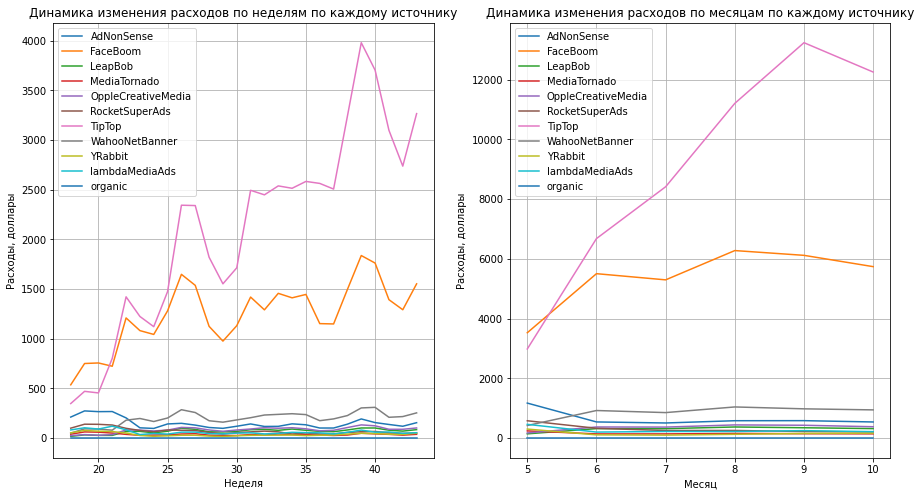

In [26]:
plt.figure(figsize=(15, 8))

profiles.pivot_table(
    index='week',
    columns='channel',
    values='acquisition_cost',
    aggfunc='sum'
).plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Расходы, доллары')
plt.title('Динамика изменения расходов по неделям по каждому источнику')

profiles.pivot_table(
    index='month',
    columns='channel',
    values='acquisition_cost',
    aggfunc='sum'
).plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Расходы, доллары')
plt.title('Динамика изменения расходов по месяцам по каждому источнику')

plt.show()

__Вывод:__ построили визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. График динамики изменения расходов по месяцам выглядит более сглаженным из-за большего усредненения расходов (по месяцам в отличии от усреднения расходов по неделям). Как ранее мы уже выяснили лидером по расходам является рекламный источник `TipTop`, на втором месте - `FaceBoom`, на третьем - `WahooNetBanner`.

#### Найдем сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [27]:
cac = profiles.query('channel != "organic"').groupby('channel').agg(
        {'acquisition_cost': ['sum', 'count', 'mean']}
    )
cac.columns = ['sum', 'count', 'cac']
cac['mean_cac'] = cac['sum'].sum() / cac['count'].sum()

cac.sort_values(by='cac', ascending=False)

,sum,count,cac,mean_cac
channel,,,,
TipTop,54751.30,19561,2.799003,1.127481
FaceBoom,32445.60,29144,1.113286,1.127481
AdNonSense,3911.25,3880,1.008054,1.127481
lambdaMediaAds,1557.60,2149,0.724802,1.127481
WahooNetBanner,5151.00,8553,0.602245,1.127481
RocketSuperAds,1833.00,4448,0.412095,1.127481
OppleCreativeMedia,2151.25,8605,0.250000,1.127481
YRabbit,944.22,4312,0.218975,1.127481
MediaTornado,954.48,4364,0.218717,1.127481


__Вывод:__ рассчитали для каждого источника сколько в среднем стоило привлечение одного пользователя (САС): `TipTop` - 2,8 доллара, `FaceBoom` - 1,11 доллара, `AdNonSense` - 1,01 доллара. `WahooNetBanner` лишь на пятом месте (0,6 доллара).

#### Промежуточный вывод

- Общая сумма расходов на маркетинг составила 105497 долларов.  
- По расходам выбиваются два рекламных источника: `TipTop` (54751 доллар) с 51.9% всех расходов на рекламу и `FaceBoom` (32446 долларов) с 30,75%.  
- Построенная визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику наглядно подтвердила данные отклонения.  
- Рассчитали для каждого источника сколько в среднем стоило привлечение одного пользователя (САС): TipTop - 2,8 доллара, FaceBoom - 1,11 доллара, AdNonSense - 1,01 доллара. Эти три источника превышаются средний CAC на одного пользователя для всего проекта - 1,13 доллара.

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы.

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

Установим момент и горизонт анализа данных. Предположим, что на календаре 1 ноября 2019 года, и зададим двухнедельный горизонт анализа. Исключим из анализа пользователей с органическим трафиком, поскольку мы за них ничего не платим.

In [28]:
#исключим пользователей с органическим трафиком

profiles = profiles.query('channel != "organic"')

In [29]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции `get_ltv()` и `plot_ltv_roi()`.

In [30]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

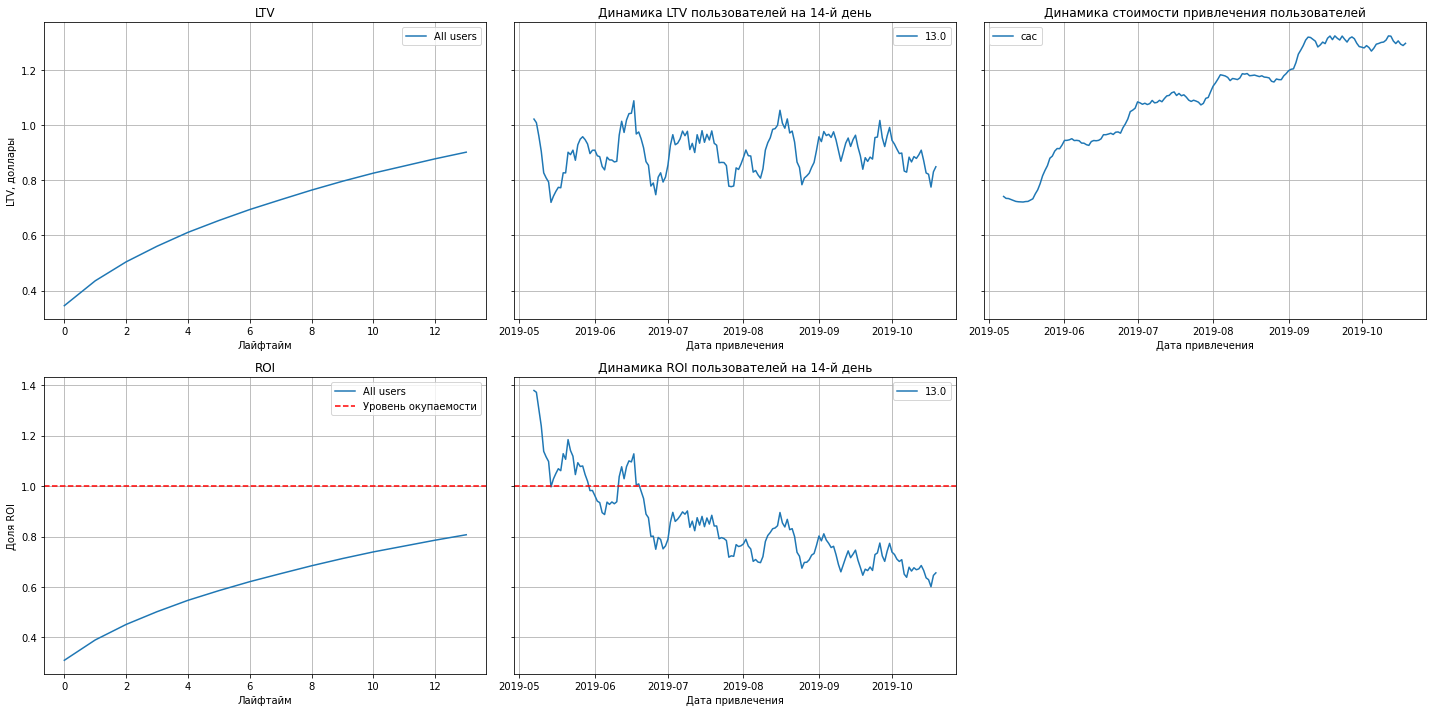

In [31]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:
- Реклама не окупается. ROI в конце второй недели едва превышает 80%.
- CAC постоянно растет, ROI - снижается. С середины июня реклама перестала окупаться. Значит, дело в увеличении рекламного бюджета.
- На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

#### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

Посчитаем и визуализируем конверсию, вызвав функции `get_conversion()` и `plot_conversion()`.

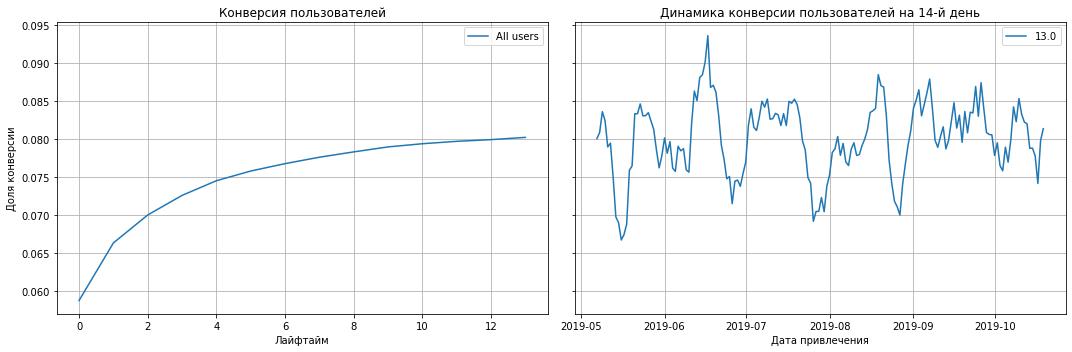

In [32]:
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

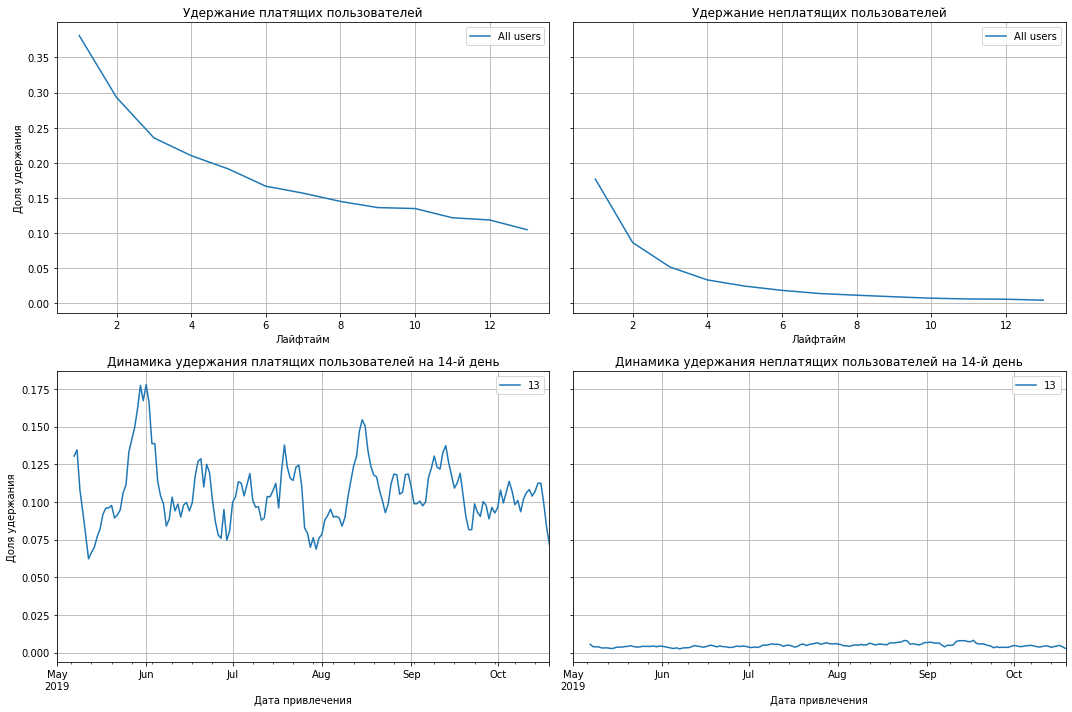

In [33]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам можно сделать такие выводы:
- Конверсия на 14-ый день состовляет чуть более 8%.
- Динамика конверсии подвержена сезонности, но стабильна.
- Удержание платящих пользователей на 14-ый день составляет чуть более 10%, что выше, чем удержание неплатящих пользователей на третий день.
- Динамика удержания платящих пользователей подвержена сезонности, но стабильна.
- Динамика удержания неплатящих пользователей стабильна и составляет менее 1%.

Чтобы разобраться в причинах неокупаемости рекламы пройдём по всем доступным характеристикам пользователей — устройству первого посещения, стране и рекламному источнику.

#### Проанализируем окупаемость рекламы, конверсию и удержание пользователей с разбивкой по устройствам. 

##### Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Начнём с разбивки по устройствам: передадим параметру `dimensions` столбец `device`.

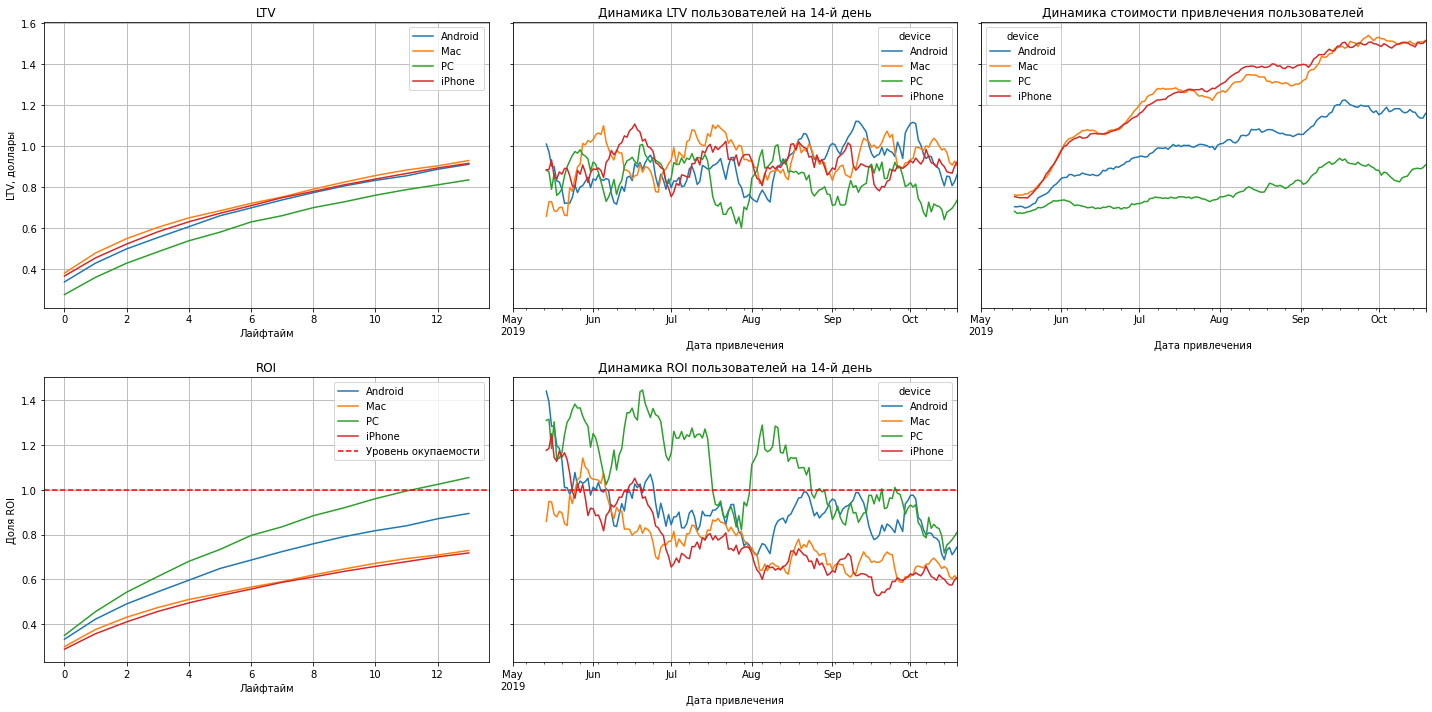

In [34]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сделать такие выводы:
- LTV для устройств показывают стабильный рост, отстает только `PC`.
- Стоимость привлечения пользователей показывает непрерывный рост и максимальна для `iPhone` и `Mac`, минимальна для `PC`.
- Реклама окупается только для `PC` на 12-ый день, для остальных устройств реклама не окупается.
- Динамика ROI показывает нисходящий тренд для всех устройств.

Стоимость привлечения пользователей высока для всех устройств, несмотря на окупаемость рекламы для `PC` на 12-ый день.

##### Построим и изучим графики конверсии и удержания.

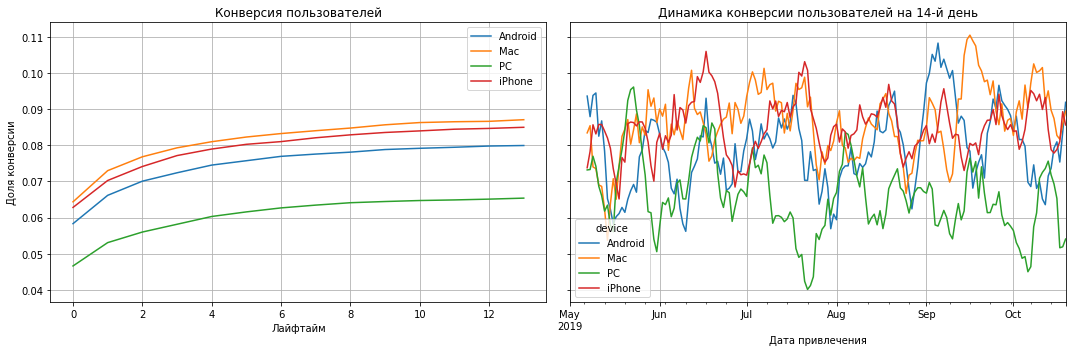

In [35]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

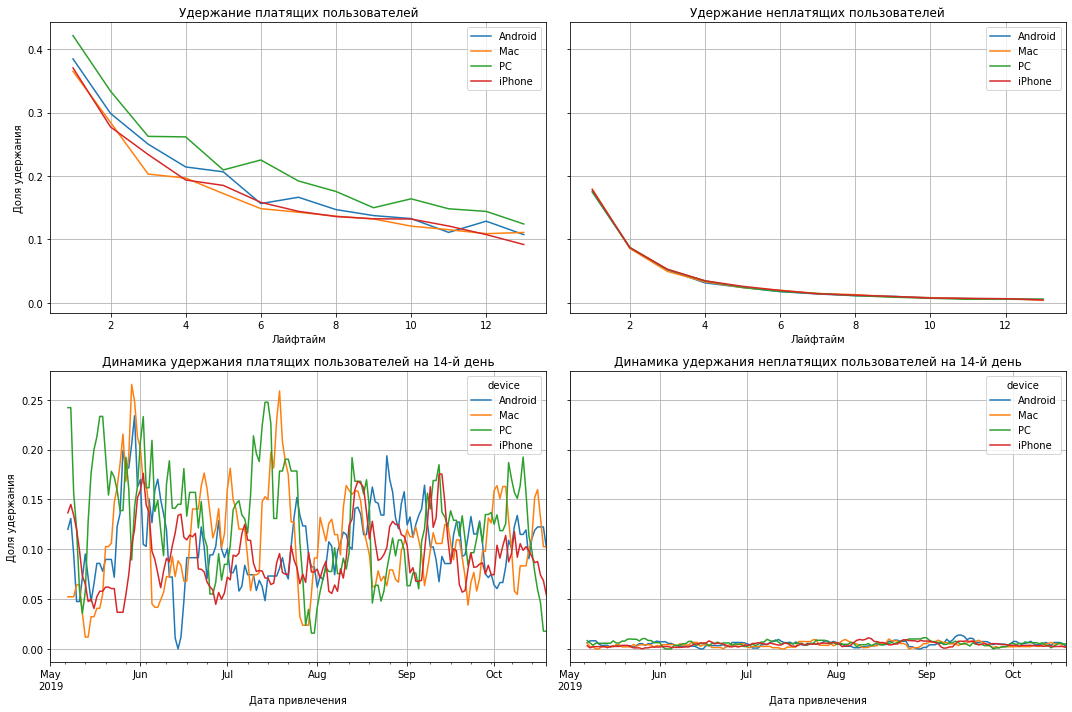

In [36]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам можно сделать такие выводы:
- Конверсия на 14-ый день максимальна для `Mac` и минимальна для `PC`.
- Динамика конверсии подвержена сезонности.
- Удержание платящих пользователей на 14-ый день максимальна для `PC` и минимальна для `iPhone`, но находится примерно на одном уровне.
- Динамика удержания платящих пользователей подвержена сезонности, но для всех устройств имеет нисходящий тренд.
- Динамика удержания неплатящих пользователей стабильна и составляет менее 1%.

#### Проанализируем окупаемость рекламы, конверсию и удержание пользователей с разбивкой по странам.

##### Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Перейдем к разбивке по странам: передадим параметру `dimensions` столбец `region`.

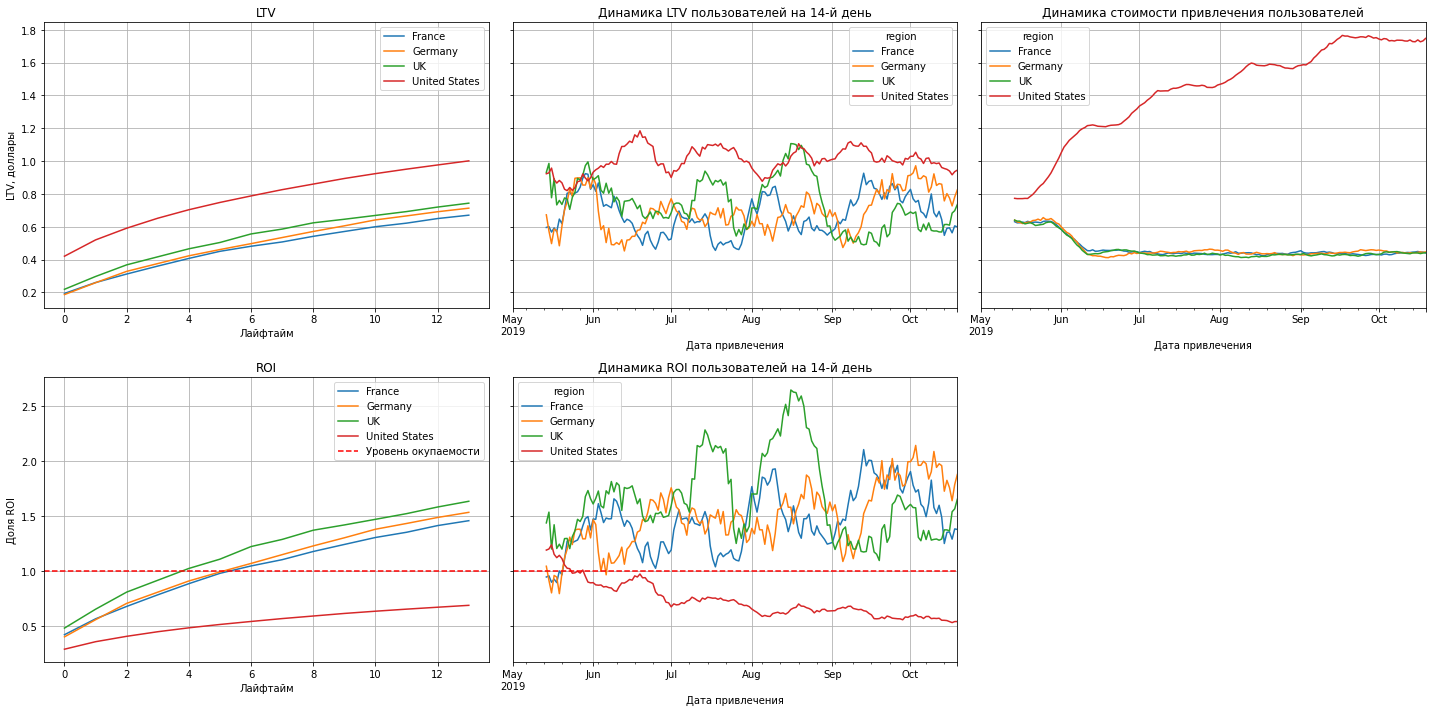

In [37]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сделать такие выводы:
- Реклама не окупается в США, в остальных странах период окупаемости - с четвертого по шестой день.
- Стоимость привлечения в США показывает бурный рост. Для остальных стран стоимость привлечения примерно одинакова, уменьшается с июня и держится на одном уровне.
- LTV подвержен сезонности, но стабилен.
- Лучше всего реклама окупается в Великобритании, явным аутсайдером является США.

Значит, дело в стране — США.

##### Построим и изучим графики конверсии и удержания.

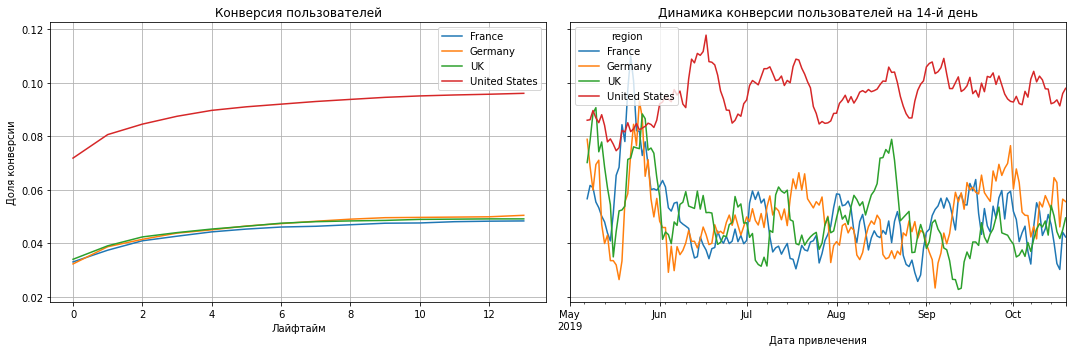

In [38]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

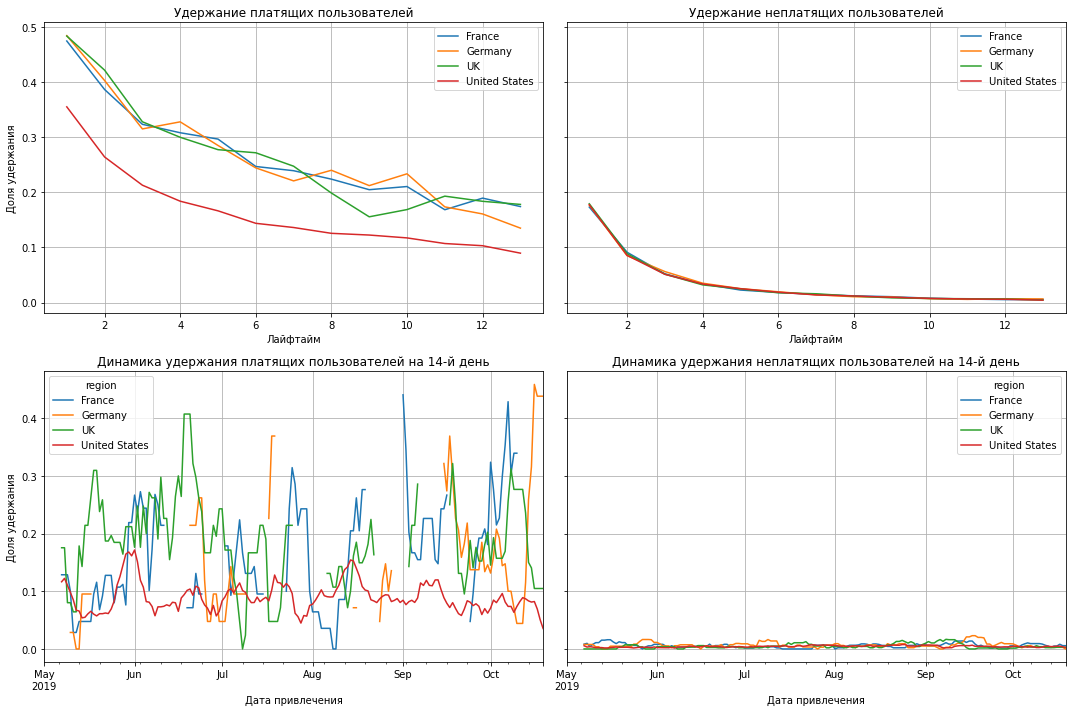

In [39]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам можно сделать такие выводы:
- Конверсия на 14-ый день максимальна для США более чем в 1,5 раза, чем для других стран.
- Динамика конверсии подвержена сезонности.
- Удержание платящих пользователей на 14-ый день минимальная для США и составляет менее 10%, далее идет Германия (около 14%) и Франция с Великобританией (около 18%).
- Динамика удержания платящих пользователей подвержена сезонности, но стабильна. Видим, что часть данных удержания платящих пользователей отсутствует, значит в эти дни не было пользователей, привлеченных из этих стран.
- Динамика удержания неплатящих пользователей стабильна и составляет менее 1%.

Несмотря на высокую конверсию пользователей из США, удержание платящих пользователей на 14-ый день для США минимально.

#### Проанализируем окупаемость рекламы, конверсию и удержание пользователей с разбивкой по рекламным каналам. 

##### Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Теперь проверим источники привлечения (`channel`). Возможно, на окупаемость влияет неудачная реклама в каком-нибудь одном канале.

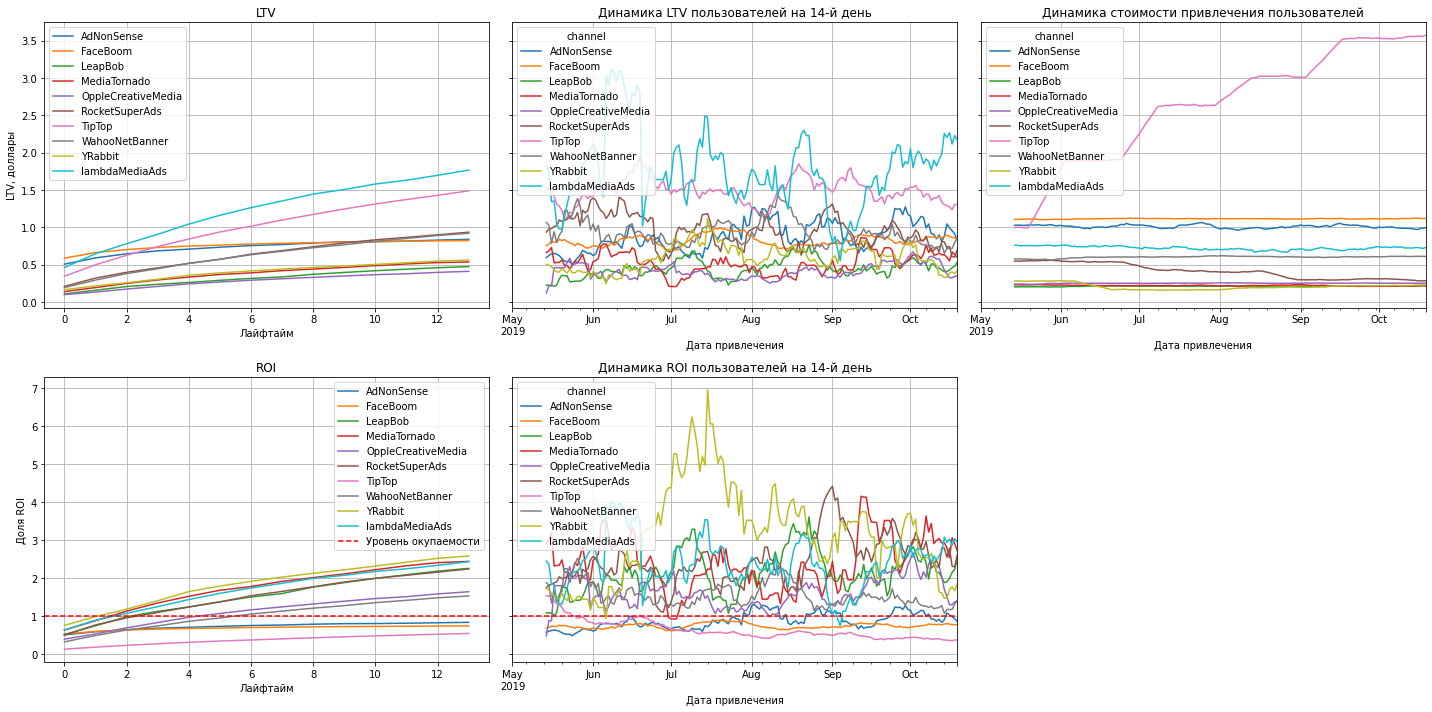

In [40]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сделать такие выводы:
- Наибольшее LTV приносит источник `lambdaMediaAds`, на втором месте - `TipTop`,  на третьем - `AdNonSense`. Наименьшее LTV у `OppleCreativeMedia`.
- Стоимость привлечения пользователей источника `TipTop` показывает постоянный рост, `RocketSuperAd` показывает снижение, остальные источники стабильны.
- Лучше всего реклама окупается для источников: `YRabbit`, `MediaTornado` и `lambdaMediaAds`. 
- Реклама не окупается для источников: `AdNonSense`, `FaceBoom` и `TipTop`.

Значит, также дело в источниках - `TipTop`, `FaceBoom` и `AdNonSense`.

##### Построим и изучим графики конверсии и удержания.

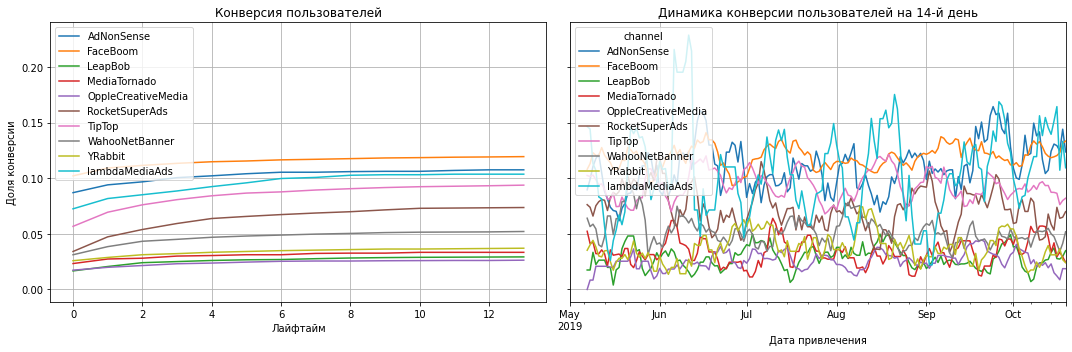

In [41]:
# смотрим конверсию с разбивкой по источникам привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

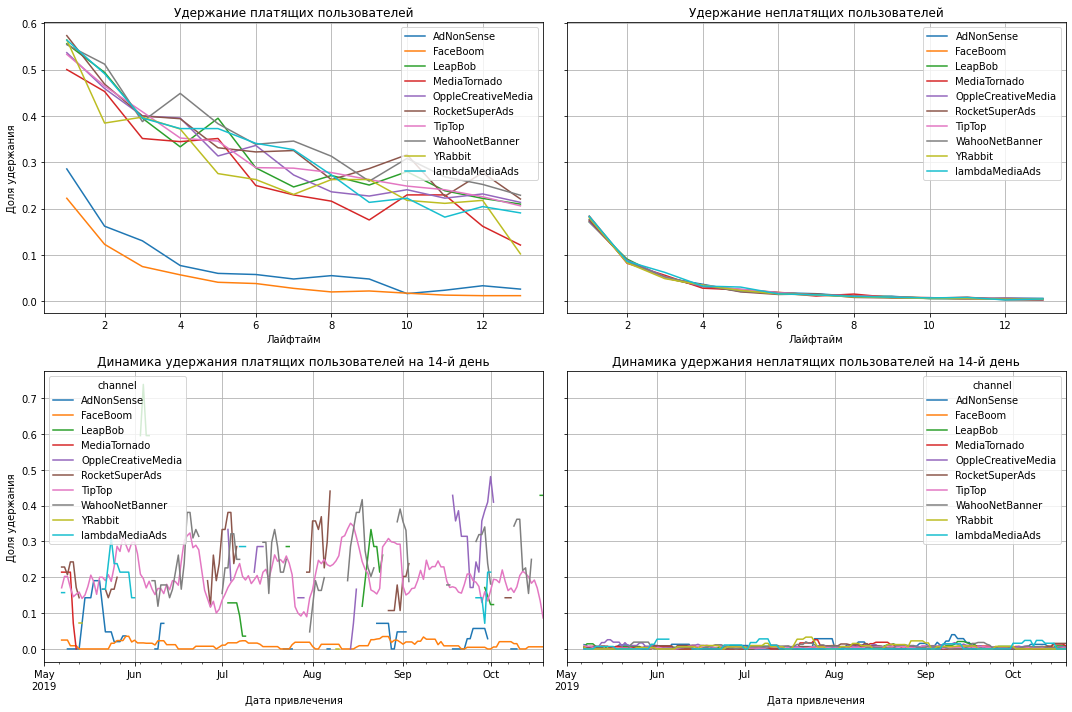

In [42]:
# смотрим удержание с разбивкой по источникам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам можно сделать такие выводы:
- Конверсия на 14-ый день максимальна для рекламного канала `FaceBoom`, на втором месте - `AdNonSense`, на третьем - `lambdaMediaAds`.
- Динамика конверсии наиболее подвержена сезонности для рекламного канала `lambdaMediaAds`.
- Удержание платящих пользователей на 14-ый день минимальное для `FaceBoom` и `AdNonSense`.
- Динамика удержания платящих пользователей подвержена сезонности, но стабильна. Видим, что часть данных удержания платящих пользователей отсутствует, значит в эти дни не было пользователей, привлеченных из этих каналов.
- Динамика удержания неплатящих пользователей подвержена сезонности и достигает примерно 3%.

#### Проанализируем окупаемость рекламы в США.

In [43]:
# отфильтруем пользователей из США

profiles_usa = profiles.query('region == "United States"')

##### Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

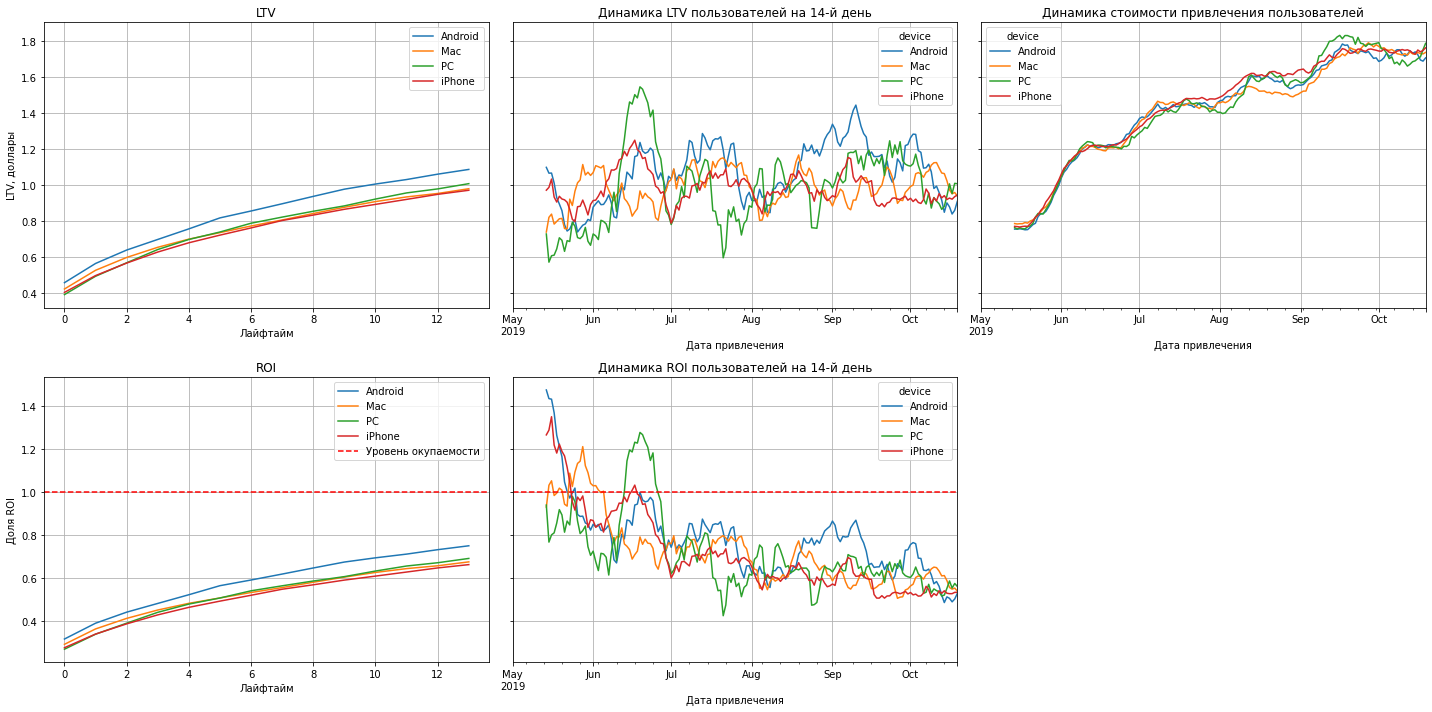

In [44]:
# смотрим окупаемость пользователей из США с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сделать такие выводы:
- LTV для устройств показывают стабильный рост, при этом `Android` опережает другие устройства.
- Стоимость привлечения пользователей показывает непрерывный рост для всех устройств.
- Реклама не окупается для всех устройств.
- Динамика ROI показывает нисходящий тренд для всех устройств, с конца июня реклама для всех устройств перестает окупаться.

Все устройства показывают одинаково плохой результат. Возможно, проблема не в устройствах.

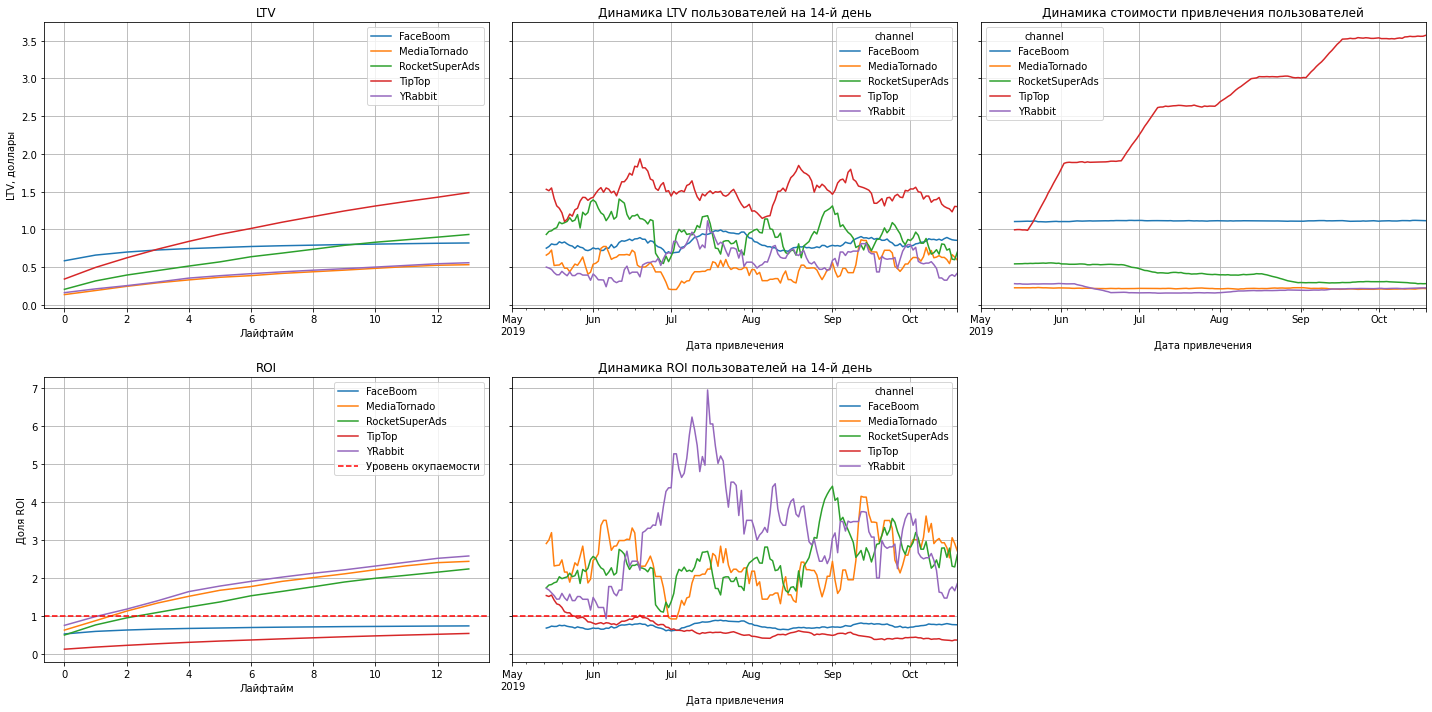

In [45]:
# смотрим окупаемость пользователей из США с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сделать такие выводы:
- Наибольшее LTV приносит источник `TipTop` с отрывом в 1,5 раза, на втором месте - `RocketSuperAd`,  на третьем - `FaceBoom`.
- Стоимость привлечения пользователей источника `TipTop` показывает постоянный рост, `RocketSuperAd` показывает снижение, остальные источники стабильны.
- Лучше всего реклама окупается для источников: `YRabbit`, `MediaTornado` и `RocketSuperAd`. 
- Реклама не окупается для источников: `FaceBoom` и `TipTop`.

Значит, проблема в источниках - `FaceBoom` и `TipTop`, их следует исключить из рекламы в США. Стоит присмотреться к рекламному источнику `RocketSuperAd` в связи с высоким LTV, низким САС и высоким ROI.

##### Построим и изучим графики конверсии и удержания.

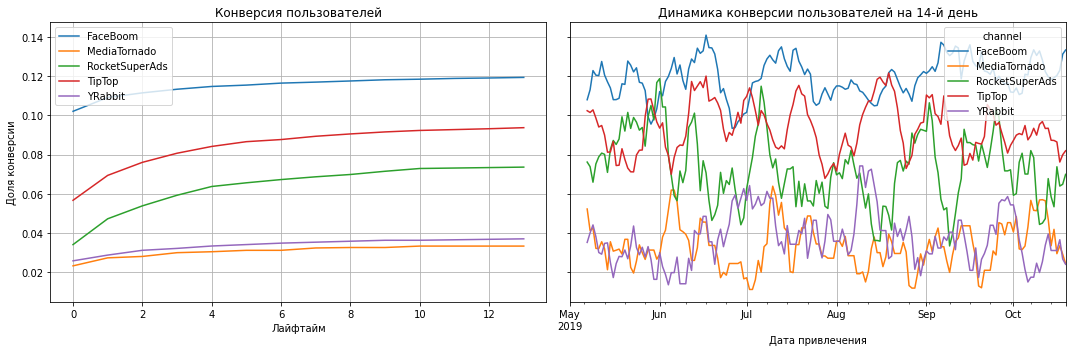

In [46]:
# смотрим конверсию пользователей из США

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

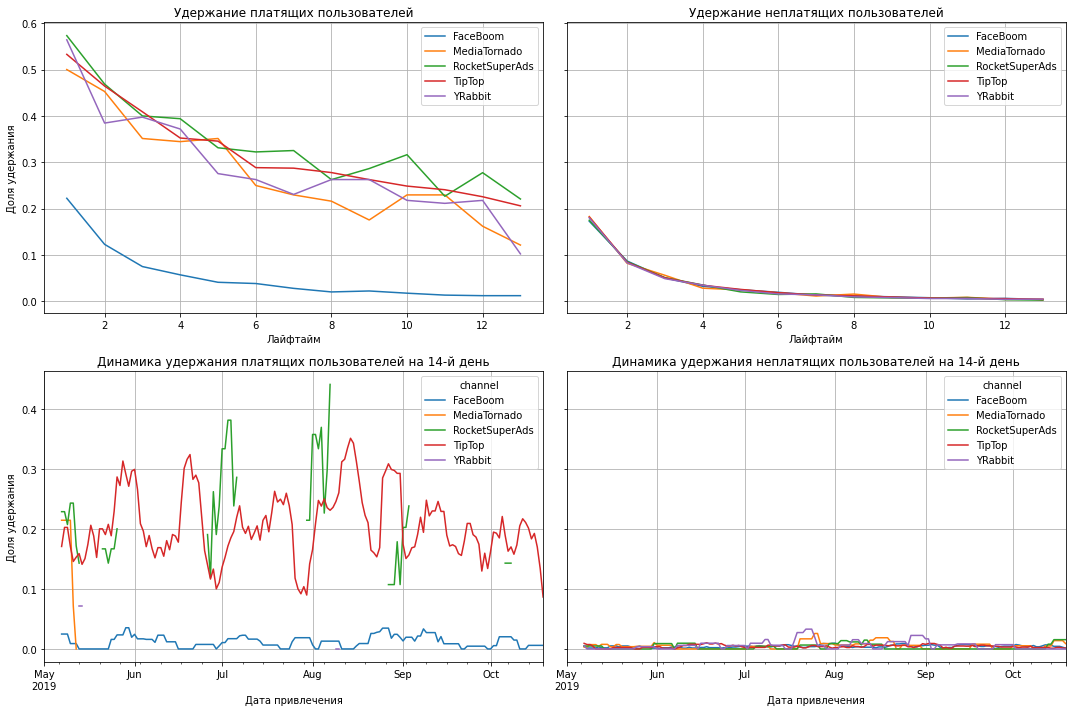

In [47]:
# смотрим удержание пользователей из США

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам можно сделать такие выводы:
- Конверсия на 14-ый день максимальна для рекламного канала `FaceBoom`, на втором месте - `TipTop`, на третьем - `RocketSuperAds`.
- Динамика конверсии подвержена сезонности, но остается стабильной.
- Удержание платящих пользователей на 14-ый день максимально для `RocketSuperAds` и минимально для `FaceBoom` (на уровне удержания неплатящих пользователей).
- Динамика удержания платящих пользователей подвержена сезонности, но стабильна. Видим, что часть данных удержания платящих пользователей отсутствует, значит в эти дни не было пользователей, привлеченных из этих каналов.
- Динамика удержания неплатящих пользователей подвержена сезонности и достигает примерно 3%.

Несмотря на выоскую конверсию рекламного канала `FaceBoom`, удержание платящих пользователей у него самое низкое и сравнимо с удержанием неплатящих пользователей. Хорошая конверсия и удержание пользователей у `TipTop` объясняется огромными расходами на рекламу. Стоит присмотреться к рекламному источнику `RocketSuperAd` в связи с хорошей конверсией и удержанием пользователей.

#### Проанализируем окупаемость рекламы в Европе.

In [48]:
# отфильтруем пользователей из Европы

profiles_eu = profiles.query('region == "France" or region == "Germany" or region == "UK"')

##### Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

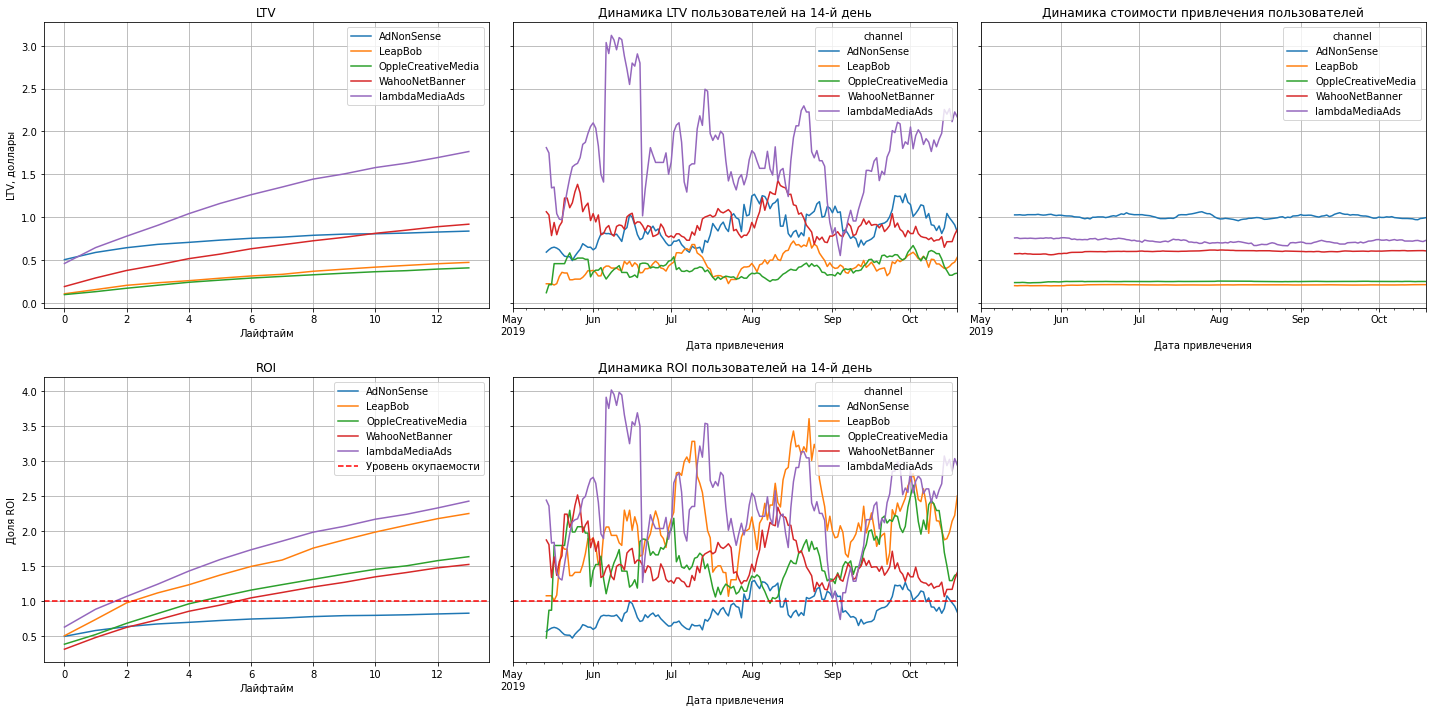

In [49]:
# смотрим окупаемость пользователей из Европы с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eu, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сделать такие выводы:
- С большим отрывом по LTV лидирует источник `lambdaMediaAds`, на втором месте - `WahooNetBanner`,  на третьем - `AdNonSense`.
- Самая высокая стоимость привлечения пользователей у источника `AdNonSense`, далее - `lambdaMediaAds` и `WahooNetBanner`.
- Лучше всего реклама окупается для источников: `lambdaMediaAds` и `LeapBob`. 
- Реклама не окупается для источников: `AdNonSense`.

Источник `lambdaMediaAds` можно рассматривать как перспективный.

##### Построим и изучим графики конверсии и удержания.

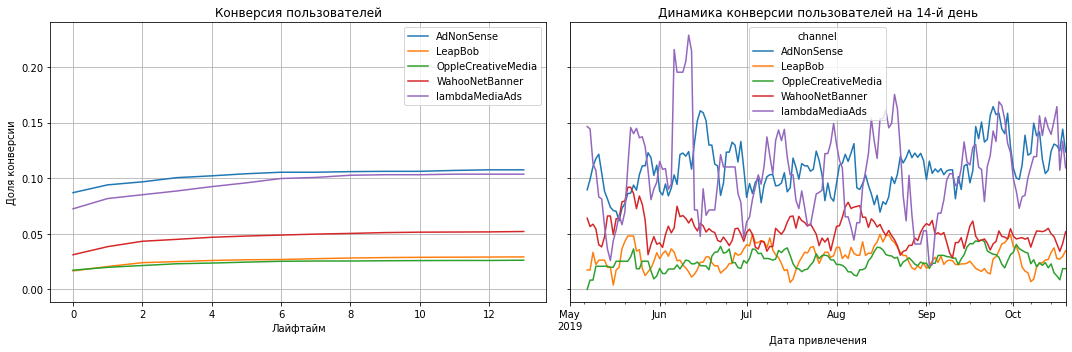

In [50]:
# смотрим конверсию пользователей из Европы с разбивкой по источникам привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_eu, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

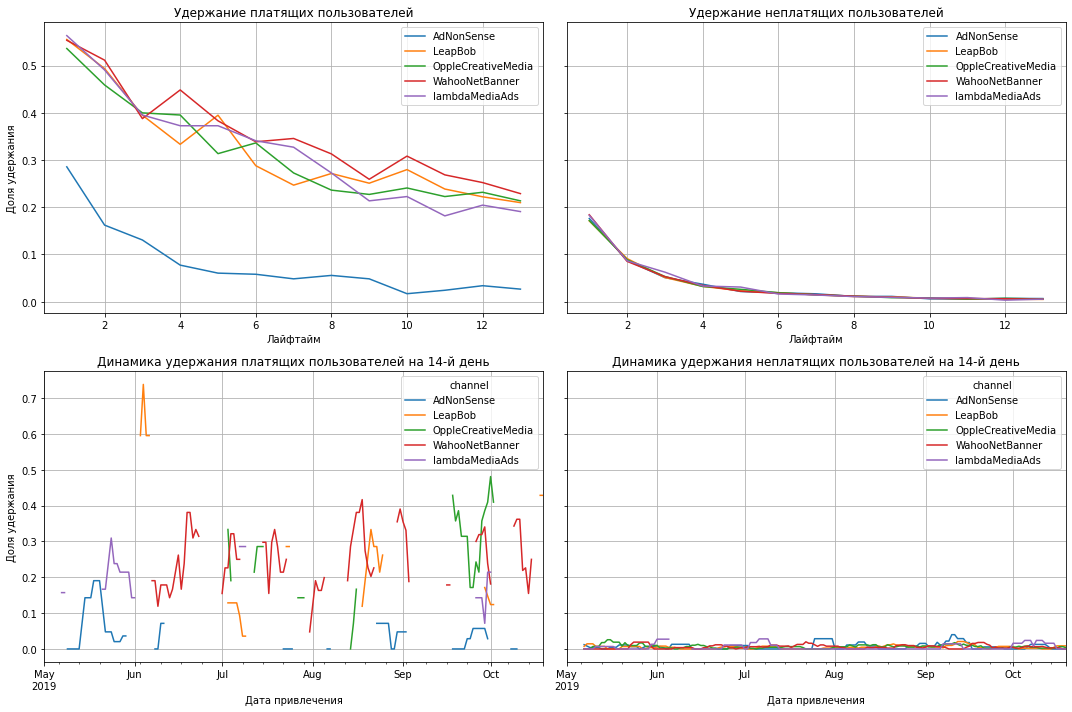

In [51]:
# смотрим удержание пользователей из Европы с разбивкой по источникам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_eu, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам можно сделать такие выводы:
- Лучшая конверсия на 14-ый день у источника `AdNonSense`, чуть ниже у `lambdaMediaAds`.
- Динамика конверсии подвержена сезонности, но стабильна.
- Удержание платящих пользователей на 14-ый находится примерно на одном уровне, кроме `AdNonSense` (сопоставимо с удержанием неплатящих пользователей).

Стоит обратить внимание на перспективный рекламный канал `lambdaMediaAds` в Европе в связи с высокими LTV, ROI и с хорошей конверсией и удержанием пользователей.

#### Промежуточный вывод

- Проанализировали окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI:
    - Реклама не окупается. ROI в конце второй недели едва превышает 80%.
    - CAC постоянно растет, ROI - снижается. С середины июня реклама перестала окупаться. Значит, дело в увеличении рекламного бюджета.
    - На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
- Проверили конверсию и удержание пользователей и динамику их изменения. Построили и изучили графики конверсии и удержания:
    - Конверсия на 14-ый день составляет чуть более 8%.
    - Динамика конверсии подвержена сезонности, но стабильна.
    - Удержание платящих пользователей на 14-ый день составляет чуть более 10%, что выше, чем удержание неплатящих пользователей на третий день.
    - Динамика удержания платящих пользователей подвержена сезонности, но стабильна.
    - Динамика удержания неплатящих пользователей стабильна и составляет менее 1%.
- Проанализировали окупаемость рекламы, конверсию и удержание пользователей с разбивкой по устройствам, странам и рекламным каналам:
    - Выявили проблему в США: реклама не окупается, а стоимость привлечения пользователей показывает бурный рост. Несмотря на высокую конверсию пользователей из США, удержание платящих пользователей на 14-ый день для США минимально.
    - Выявили проблему для устройств `iPhone`, `Mac`, `Android`: реклама не окупается. Реклама для `PC` окупается на 12-ый день.
    - Выявили проблему для рекламных каналов `TipTop`, `FaceBoom` и `AdNonSense`: реклама не окупается. Удержание платящих пользователей на 14-ый день минимальное для `FaceBoom` и `AdNonSense`.
- Отдельно проанализировали окупаемость рекламы в США:
    - Реклама не окупается для всех устройств.
    - Несмотря на высокий LTV, реклама не окупается для источников: `FaceBoom` и `TipTop`.
    - Удержание платящих пользователей на 14-ый день максимально для `RocketSuperAds` и минимально для `FaceBoom` (на уровне удержания неплатящих пользователей).

Промежуточные рекомендации для рекламного отдела:
- Исключить использование рекламного канала `TipTop` и пересмотреть использование - `AdNonSense`, `FaceBoom`.
- Проверить на наличие технических проблем, с которыми сталкиваются пользователи `iPhone` и `Mac` во всех странах, а для США проверить работу приложения на всех устройствах.
- Снизить рекламные расходы в США.
- Стоит обратить внимание на перспективный рекламный канал `lambdaMediaAds` в Европе в связи с высокими LTV, ROI и с хорошей конверсией и удержанием пользователей.
- Стоит обратить внимание на перспективный рекламный канал `RocketSuperAds` в США в связи с высоким LTV, низким САС, высоким ROI и с хорошей конверсией и удержанием пользователей.

### Общий вывод

Причины неэффективности привлечения пользователей:
- Реклама в США:
    - Несмотря на высокий LTV, реклама не окупается для источников `FaceBoom` и `TipTop` в связи с высоким САС. Удержание платящих пользователей на 14-ый день минимально для `FaceBoom` (на уровне удержания неплатящих пользователей).
- Рекламный канал `TipTop`:
    - Реклама не окупается в связи с высоким САС - 2,8 доллара (51.9% всех рекламных расходов). При этом LTV ниже, чем у `lambdaMediaAds`.
- Рекламные каналы `FaceBoom` и  `AdNonSense`:
    - Реклама не окупается в связи с высокими САС `FaceBoom` - 1,11 доллара (30,75% всех рекламных расходов) и `AdNonSense` - 1,01 доллара (3,71% всех рекламных расходов). Удержание платящих пользователей на 14-ый день минимальное для `FaceBoom` и `AdNonSense`. 
- Проанализировали окупаемость рекламы, конверсию и удержание пользователей с разбивкой по устройствам:
    - Выявили проблему для устройств `iPhone`, `Mac`, `Android`: реклама не окупается. Реклама для `PC` окупается на 12-ый день.

Рекомендации для отдела маркетинга:
- Пересмотреть использование рекламных каналов `TipTop`,`AdNonSense` и `FaceBoom`.
- Проверить на наличие технических проблем, с которыми сталкиваются пользователи `iPhone` и `Mac`, `Android` во всех странах, а для США - на всех устройствах.
- Снизить рекламные расходы в США.
- Обратить внимание на рекламу в Великобритании, в августе динамика ROI для нее была максимальной, стоит проанализировать прошедшую рекламную кампанию и повторить ее в будущем.
- Стоит обратить внимание на перспективный рекламный канал `lambdaMediaAds` в Европе в связи с высокими LTV, ROI и с хорошей конверсией и удержанием пользователей.
- Стоит обратить внимание на перспективный рекламный канал `RocketSuperAds` в США в связи с высоким LTV, низким САС, высоким ROI и с хорошей конверсией и удержанием пользователей.